<a href="https://colab.research.google.com/github/SharabNandakiran/Project/blob/main/Project_Customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Conversion Prediction**

### **Problem Statement**
You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.


### **Features:**

*  age (numeric)
*   job : type of job
*   marital : marital status
*   educational_qual : education status
*   call_type : contact communication type
*   day: last contact day of the month (numeric)
*   mon: last contact month of year
*   dur: last contact duration, in seconds (numeric)
*   num_calls: number of contacts performed during this campaign and for this   client
*   prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")


*   Output variable (desired target):
y - has the client subscribed to the insurance?


♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦



# **Basic Analysis of Dataset from Problem Statement and Features**

*   It is a supervised learning problem - We are predicting target variable
*   From target varible we can clearly understand it is a classification problem
*   From target variable we can tell it is a binary classification problem.   target = (y/n)


# **Importing Libraries**

In [1]:
# for data reading and data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# **Loading Dataset**

In [2]:
df=pd.read_csv("Insuarance_Historical_Marketing_Data.csv")

# **Analysis of Data**

In [3]:
# Checking size of dataset
df.shape

(45211, 11)

From the above result no of rows are 45211 and no of columns are 11

In [4]:
#Fetching top 5 row in dataset
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [5]:
#Fetching Bottom 5 rows
df.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
45210,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


In [6]:
#finding the column names
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [7]:
#checking for the data is balanced or not
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

From the above result we can clearly understand that the dataset is imbalanced. Lets find the percentage.

In [8]:
#Finding the percentage of the data
print('Percentage for "no": ',((39916) / (45211)) * 100 )
print('Percentage for "yes": ',((5289) / (45211)) * 100 )

Percentage for "no":  88.28824843511535
Percentage for "yes":  11.698480458295547


from the above result we can clearly understand that the percentage for no is very high so the Majority class "no" with 88.29% and Minority class "yes" with 11.7%.

# **Data Preprocessing**
# **Checking and Handling Missing Values in Data**

Data cleaning is the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in a dataset to improve its quality and ensure that it is ready for analysis. It involves tasks such as handling missing or duplicate data, correcting data types, and removing outliers or irrelevant information.

### **Missing Values**

In [9]:
#checking for null values
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

### **Finding Duplicate Values**

In [10]:
#checking for no of duplicate values
df.duplicated().sum()

6

From the above result we can find 6 duplicate datas. So will drop the duplicates.

In [11]:
#droping duplicates
df = df.drop_duplicates()

In [12]:
#after droping agin check for no of duplicates
df.duplicated().sum()

0

Duplicates are removed from dataset.

### **Checking Data Type**

In [13]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

There is no need to change any datatype of the columns

### **Unique Values of Categorical Column**

In [14]:
print("Unique values of Job \n")
print(df['job'].unique())

Unique values of Job 

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [15]:
print("Unique values of Marital Status \n")
print(df['marital'].unique())

Unique values of Marital Status 

['married' 'single' 'divorced']


In [16]:
print("Unique values of Educationsl Qualification \n")
print(df['education_qual'].unique())

Unique values of Educationsl Qualification 

['tertiary' 'secondary' 'unknown' 'primary']


In [17]:
print("Unique values of Call Type \n")
print(df['call_type'].unique())

Unique values of Call Type 

['unknown' 'cellular' 'telephone']


In [18]:
print("Unique values of Month \n")
print(df['mon'].unique())

Unique values of Month 

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [19]:
print("Unique values of Previous Outcome \n")
print(df['prev_outcome'].unique())

Unique values of Previous Outcome 

['unknown' 'failure' 'other' 'success']


In [20]:
print("Unique values of Target Variable 'y' \n")
print(df['y'].unique())

Unique values of Target Variable 'y' 

['no' 'yes']


From all the above results all values are unique which means there is no incorrect or wrong data that is spelling mistake, upper case and lower case mismatch of each values.

### **Exploring the Dataset and replace the unknown values**

**Converting categorical Target column into numerical column.**

In [21]:
df['target'] = df["y"].map({"yes":1 , "no": 0})

In [22]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no,0


**Age**

In [23]:
#no of counts for particular age
df.age.value_counts()

32    2084
31    1996
33    1972
34    1929
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [24]:
#checking for the percentage of how many people get insured? compared with Target vs Age
df.groupby('age')['target'].mean()

age
18    0.583333
19    0.314286
20    0.300000
21    0.278481
22    0.310078
        ...   
90    1.000000
92    1.000000
93    1.000000
94    0.000000
95    0.500000
Name: target, Length: 77, dtype: float64

**Job**

In [25]:
#no of counts for particular job
df.job.value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [26]:
#checking for the percentage of how many people get insured? compared with Target vs Job
df.groupby('job')['target'].mean()

job
admin.           0.122050
blue-collar      0.072765
entrepreneur     0.082717
housemaid        0.087903
management       0.137570
retired          0.227915
self-employed    0.118429
services         0.088851
student          0.286780
technician       0.110585
unemployed       0.155027
unknown          0.118056
Name: target, dtype: float64

In [27]:
# droping the column unknown
#outof 45211 rows, deletion of 288 rows will not get more impact on dataset so planning to delete

#replacing unknown value as null
df['job'] =df['job'].replace('unknown',np.nan)

In [28]:
#counting the no of null value in jab column
df.job.isnull().sum()

288

In [29]:
#removing null values from job column
df=df.dropna(subset=['job'])

In [30]:
#after removing null values checking for the summ of null vaues
df.job.isnull().sum()

0

**Marital Status**

In [31]:
#no of counts for marital status
df.marital.value_counts()

married     27007
single      12720
divorced     5190
Name: marital, dtype: int64

In [32]:
#checking for the percentage of how many people get insured? compared with Target vs Marital Status
df.groupby('marital')['target'].mean()

marital
divorced    0.119653
married     0.101233
single      0.149371
Name: target, dtype: float64

**Educational Qualification**

In [33]:
#no of counts for Educational qualification
df.education_qual.value_counts()

secondary    23128
tertiary     13260
primary       6799
unknown       1730
Name: education_qual, dtype: int64

In [34]:
#checking for the percentage of how many people get insured? compared with Target vs Educational Qualification
df.groupby('education_qual')['target'].mean()

education_qual
primary      0.086483
secondary    0.105543
tertiary     0.150226
unknown      0.135260
Name: target, dtype: float64

In [35]:
#Finding the percentage of unknown value
print('Percentage for "Unknown": ',((1730) / (23202+13301+6851+1730)) * 100 )

Percentage for "Unknown":  3.8372815189424188


Unknown percentage is 3.8% so if we delete also it will note affect the dataset

In [36]:
#replacing unknown value as null
df['education_qual'] =df['education_qual'].replace('unknown',np.nan)

In [37]:
#checking for null values
df.education_qual.isnull().sum()

1730

In [38]:
#droping the null values
df = df. dropna(subset=['education_qual'])

In [39]:
#checking for null value after deleting
df.education_qual.isnull().sum()

0

**Call Type**

In [40]:
#no of counts for Call type
df.call_type.value_counts()

cellular     28210
unknown      12283
telephone     2694
Name: call_type, dtype: int64

In [41]:
#checking for the percentage of how many people get insured? compared with Target vs Call Type
df.groupby('call_type')['target'].mean()

call_type
cellular     0.147572
telephone    0.129918
unknown      0.041358
Name: target, dtype: float64

In [42]:
#Finding the percentage of unknown value
print('Percentage for "Unknown": ',((12283) / (29285+13020+12283)) * 100 )

Percentage for "Unknown":  22.501282333113505


Unknown call type percentage is 22.50% so we will keep as it is.

**Day**

In [43]:
#no of counts for Day
df.day.value_counts()

20    2628
18    2227
21    1961
17    1872
6     1817
5     1796
14    1784
8     1758
7     1739
28    1739
29    1661
19    1656
15    1649
12    1542
13    1529
9     1483
30    1481
11    1397
4     1372
16    1331
2     1243
27    1072
3     1039
26     994
23     900
22     875
25     810
31     597
10     504
24     426
1      305
Name: day, dtype: int64

In [44]:
#checking for the percentage of how many people get insured? compared with Target vs Day
df.groupby('day')['target'].mean()

day
1     0.278689
2     0.139179
3     0.166506
4     0.160350
5     0.114143
6     0.094111
7     0.086832
8     0.105802
9     0.113284
10    0.224206
11    0.121689
12    0.153696
13    0.152387
14    0.109305
15    0.141298
16    0.133734
17    0.090812
18    0.100584
19    0.069444
20    0.070396
21    0.098929
22    0.162286
23    0.131111
24    0.143192
25    0.155556
26    0.105634
27    0.125933
28    0.075331
29    0.074052
30    0.173531
31    0.073702
Name: target, dtype: float64

**Month**

In [45]:
#no of counts for month
df.mon.value_counts()

may    13191
jul     6600
aug     6035
jun     4978
nov     3842
apr     2820
feb     2533
jan     1318
oct      690
sep      532
mar      448
dec      200
Name: mon, dtype: int64

In [46]:
#checking for the percentage of how many people get insured? compared with Target vs Month
df.groupby('mon')['target'].mean()

mon
apr    0.192553
aug    0.109196
dec    0.465000
feb    0.165022
jan    0.100152
jul    0.088788
jun    0.105062
mar    0.537946
may    0.067319
nov    0.101510
oct    0.430435
sep    0.471805
Name: target, dtype: float64

**Duration**

In [47]:
#no of counts for duration
df.dur.value_counts()

124     176
90      172
89      172
114     172
122     169
       ... 
1327      1
1331      1
1608      1
1833      1
1556      1
Name: dur, Length: 1558, dtype: int64

In [48]:
#checking for the percentage of how many people get insured? compared with Target vs Duration
df.groupby('dur')['target'].mean()

dur
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3366    0.0
3422    0.0
3785    0.0
3881    1.0
4918    0.0
Name: target, Length: 1558, dtype: float64

**Number of Calls**

In [49]:
#no of counts for number of calls
df.num_calls.value_counts()

1     16740
2     11936
3      5277
4      3397
5      1703
6      1234
7       696
8       516
9       307
10      255
11      190
12      149
13      123
14       85
15       81
16       75
17       65
18       47
19       43
20       42
21       33
25       22
22       20
24       20
23       20
28       16
29       13
26       12
31       11
32        9
27        9
30        8
33        6
34        4
36        4
38        3
35        3
43        2
50        2
41        2
51        1
37        1
46        1
55        1
58        1
39        1
44        1
Name: num_calls, dtype: int64

In [50]:
#checking for the percentage of how many people get insured? compared with Target vs Numer of Calls
df.groupby('num_calls')['target'].mean()

num_calls
1     0.145221
2     0.110841
3     0.111237
4     0.088902
5     0.079859
6     0.072123
7     0.064655
8     0.058140
9     0.065147
10    0.050980
11    0.078947
12    0.026846
13    0.048780
14    0.047059
15    0.049383
16    0.026667
17    0.076923
18    0.000000
19    0.000000
20    0.023810
21    0.030303
22    0.000000
23    0.000000
24    0.050000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.076923
30    0.000000
31    0.000000
32    0.111111
33    0.000000
34    0.000000
35    0.000000
36    0.000000
37    0.000000
38    0.000000
39    0.000000
41    0.000000
43    0.000000
44    0.000000
46    0.000000
50    0.000000
51    0.000000
55    0.000000
58    0.000000
Name: target, dtype: float64

**Previous Outcome**

In [51]:
#no of counts for previous outcome
df.prev_outcome.value_counts()

unknown    35280
failure     4709
other       1774
success     1424
Name: prev_outcome, dtype: int64

In [52]:
#checking for the percentage of how many people get insured? compared with Target vs Previous outcome
df.groupby('prev_outcome')['target'].mean()

prev_outcome
failure    0.124655
other      0.165163
success    0.643961
unknown    0.091383
Name: target, dtype: float64

In [53]:
#Finding the percentage of unknown value
print('Percentage for "Unknown": ',((35280) / (35280+4709+1774+1424)) * 100 )

Percentage for "Unknown":  81.69124968161715


It is around 81% values are unknown. So will keep unknown value as it is.

**Target Variable Y**

In [54]:
#no of counts of target variable y
df.y.value_counts()

no     38166
yes     5021
Name: y, dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43187 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             43187 non-null  int64 
 1   job             43187 non-null  object
 2   marital         43187 non-null  object
 3   education_qual  43187 non-null  object
 4   call_type       43187 non-null  object
 5   day             43187 non-null  int64 
 6   mon             43187 non-null  object
 7   dur             43187 non-null  int64 
 8   num_calls       43187 non-null  int64 
 9   prev_outcome    43187 non-null  object
 10  y               43187 non-null  object
 11  target          43187 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 4.3+ MB


### **Outlier Deduction and Correction**
**Outlier Detection**
1.   Z-Score:
      Z-Score(x)=(x-mean(x)) / SD(x)
      **Threshold Limit**
      Z-Score > 3 and Z-Score < -3 ---> Outlier
2.   IQR:
      IQR = Q3(75%)-Q1(25%)
      **Upper Threshold** = Q3 + (1.5 * IQR)
      **Lower Threshold** = Q1 - (1.5 * IQR)
3.   Plotting:
      Box Plot

**Outlier Correction**
1.   Deletion
2.   Clip/Strip



In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43187 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             43187 non-null  int64 
 1   job             43187 non-null  object
 2   marital         43187 non-null  object
 3   education_qual  43187 non-null  object
 4   call_type       43187 non-null  object
 5   day             43187 non-null  int64 
 6   mon             43187 non-null  object
 7   dur             43187 non-null  int64 
 8   num_calls       43187 non-null  int64 
 9   prev_outcome    43187 non-null  object
 10  y               43187 non-null  object
 11  target          43187 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 4.3+ MB


## **Age**

**Box Plot**

<Axes: xlabel='age'>

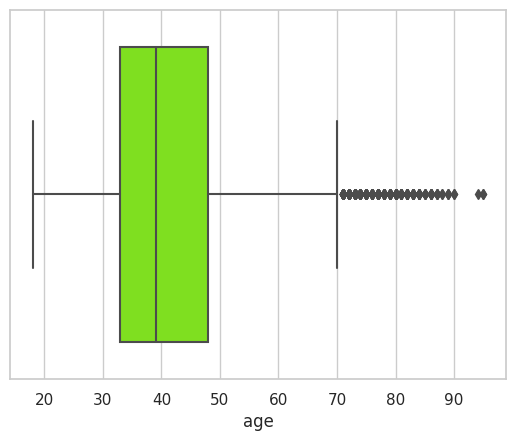

In [57]:
#Outlier Detuction using Box Plot for Age Column
sns.set(style="whitegrid")
sns.boxplot(x=df['age'], color='Chartreuse')

From outlier we can see that there are many dots are displayed outside whisker.

**IQR**

In [58]:
#detecting Outlier for Age column
q1,q3=np.percentile(df["age"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper age bound:",upper,"Lower age bound :", lower)

Upper age bound: 70.5 Lower age bound : 10.5


**Removing outlier for Age**

In [59]:
#removing outlier for age column
# Clip/ Strip is used to detuct value to lower & upper threshold.
df.age = df.age.clip(10.5,70.5)

In [60]:
df.age.describe()

count    43187.000000
mean        40.702549
std         10.305239
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64

**Checking- After outlier removal**

<Axes: xlabel='age'>

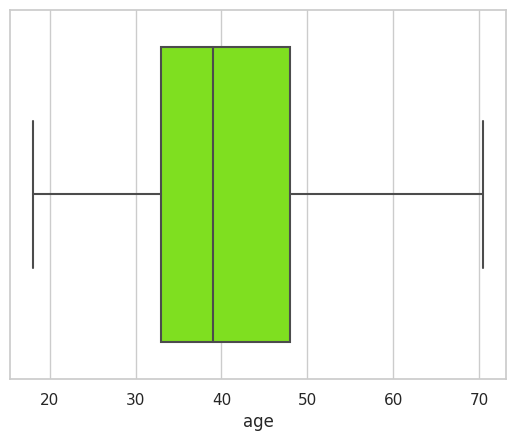

In [61]:
sns.set(style="whitegrid")
sns.boxplot(x=df['age'], color='Chartreuse')

## **Day**

**Box Plot**

<Axes: xlabel='day'>

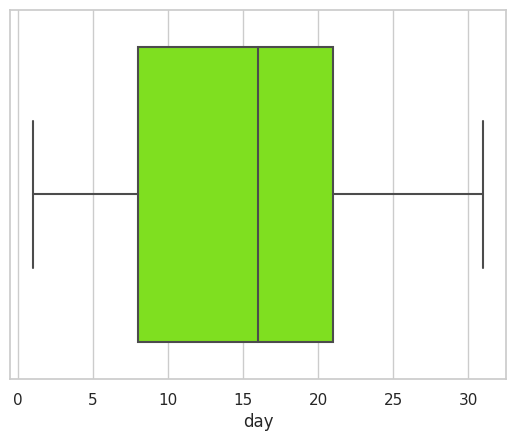

In [62]:
#Outlier Detuction using Box Plot for day Column
sns.set(style="whitegrid")
sns.boxplot(x=df['day'], color='Chartreuse')

**IQR**

In [63]:
#detecting Outlier for Age column
q1,q3=np.percentile(df["day"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 40.5 Lower bound : -11.5


In [64]:
df.day.describe()

count    43187.000000
mean        15.809896
std          8.305826
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

From Box plot itself we can tell there is no outlier, even though checked with IQR approach. min and max values are in between lower and upper bound.

## **Duration**

**Box Plot**

<Axes: >

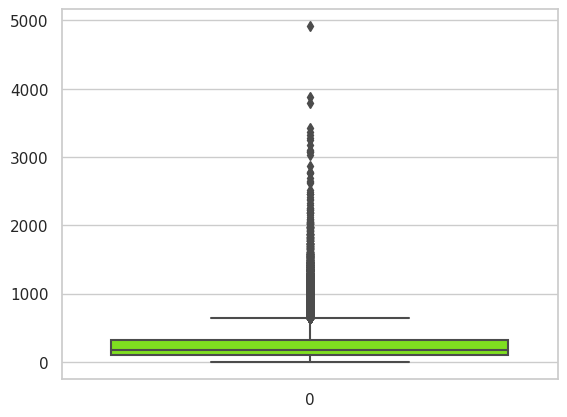

In [65]:
#Outlier Detuction using Box Plot for duration Column
sns.set(style="whitegrid")
sns.boxplot(df['dur'], color='Chartreuse')

**IQR**

In [66]:
#detecting Outlier for Duration column
q1,q3=np.percentile(df["dur"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 640.5 Lower bound : -219.5


**Removing Outlier for duration column**

In [67]:
#removing outlier for duration column
# Clip/ Strip is used to detuct value to lower & upper threshold.
df.dur = df.dur.clip(-219.5,640.5)

In [68]:
df.dur.describe()

count    43187.000000
mean       234.788038
std        176.240001
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max        640.500000
Name: dur, dtype: float64

**Checking after outlier removal**

<Axes: >

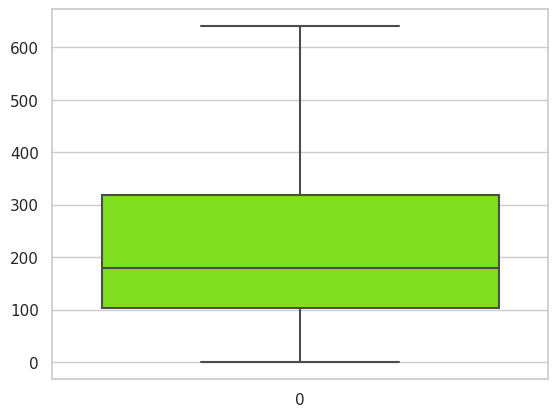

In [69]:
sns.set(style="whitegrid")
sns.boxplot(df['dur'], color='Chartreuse')

## **No of Calls**

**Box Plot**

<Axes: >

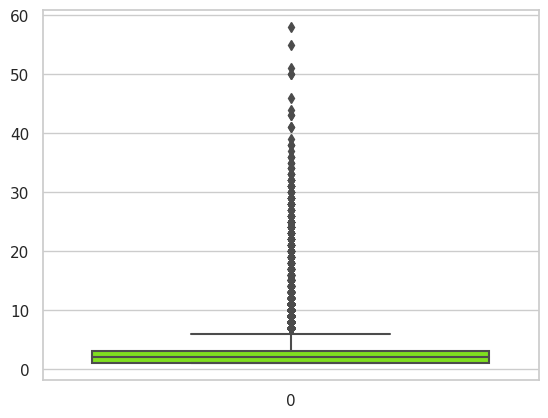

In [70]:
#checking for outlier using boxplot fot the column no of calls
sns.set(style="whitegrid")
sns.boxplot(df['num_calls'], color='Chartreuse')

**IQR**

In [71]:
#detecting Outlier for number of calls column
q1,q3=np.percentile(df["num_calls"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 6.0 Lower bound : -2.0


In [72]:
#removing outlier for num_calls column
# Clip/ Strip is used to detuct value to lower & upper threshold.
df.num_calls = df.num_calls.clip(-2,6.0)

In [73]:
df.num_calls.describe()

count    43187.000000
mean         2.393081
std          1.598892
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

**Checking after outlier removal**

<Axes: >

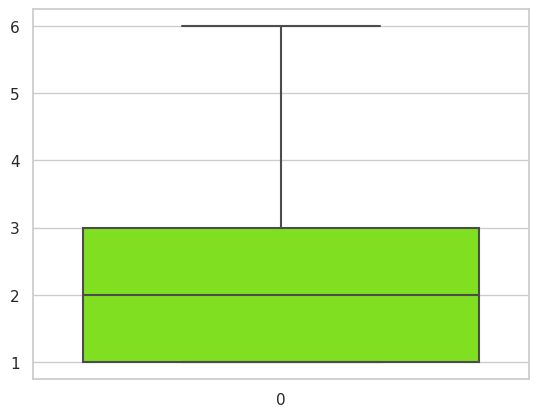

In [74]:
sns.set(style="whitegrid")
sns.boxplot(df['num_calls'], color='Chartreuse')

we detucted and removed outlier for all numerical columns. So we are done with Data Cleaning Process.

# **EDA - Exploratory Data Analysis**

EDA is an important step in the data analysis process, as it helps to identify potential issues with the data and to develop a deeper understanding of the relationships between variables.

### **Distribution of Feature and Target variable**

<ipython-input-75-67e0172ec620>:257: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


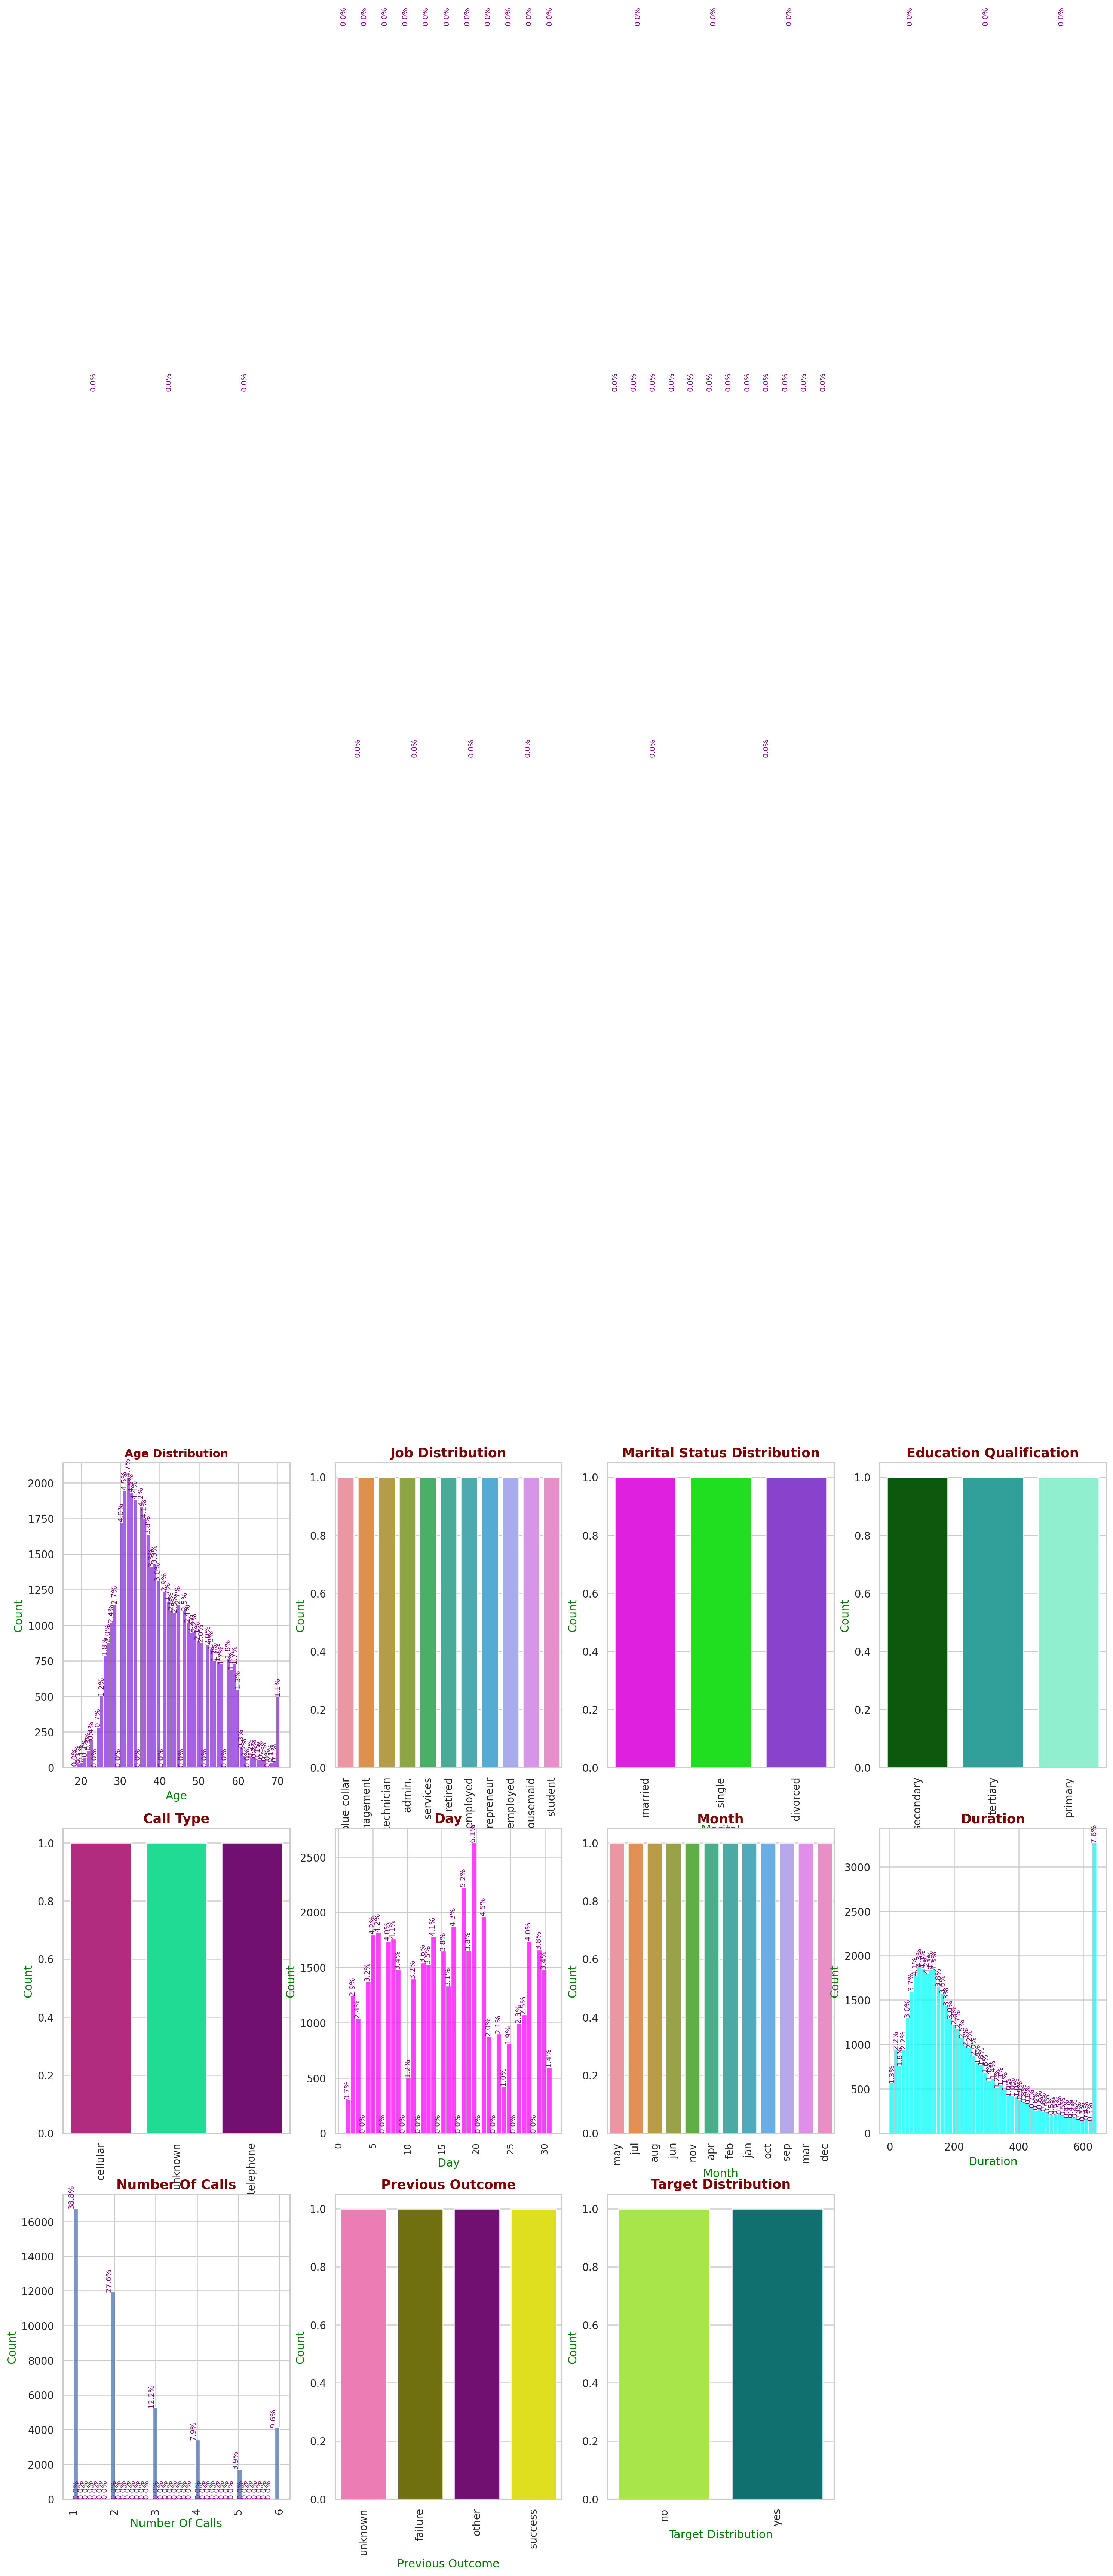

In [75]:
# Age distribution
plt.figure(figsize = (20,20),dpi=180)
plt.subplot(3,4,1)
sns.histplot((df.age),color='BlueViolet')

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['age']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Age Distribution', fontsize = 12, color='maroon', fontweight='bold')
plt.xlabel('Age',fontsize = 12, color='green')
plt.ylabel('Count',fontsize = 12, color='green')

#Job distribution
plt.subplot(3,4,2)
sns.countplot(df['job'],x=df.job.value_counts().index)

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['job']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Job Distribution', fontsize = 14, color="maroon", fontweight='bold')
plt.xlabel('Type Of Job',fontsize = 12, color='green')
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12, color='green')



# Marital distribution
plt.subplot(3,4,3)
custom_colors = {'married': 'Magenta', 'divorced': 'BlueViolet', 'single': 'Lime'}
sns.countplot(df['marital'],x=df.marital.value_counts().index, palette=custom_colors)

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['marital']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Marital Status Distribution', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Marital',fontsize = 12, color='green')
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12, color='green')



# Education qualification distribution
plt.subplot(3,4,4)
custom_colors = {'secondary': 'DarkGreen', 'tertiary': 'LightSeaGreen', 'primary': 'Aquamarine'}
sns.countplot(df['education_qual'],x=df.education_qual.value_counts().index, palette=custom_colors)

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['education_qual']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Education Qualification', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Education',fontsize = 12, color='green')
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12, color='green')




# Call type distribution
plt.subplot(3,4,5)
custom_colors = {'cellular': 'MediumVioletRed', 'telephone': 'purple', 'unknown' :'MediumSpringGreen'}
sns.countplot(df['call_type'],x=df.call_type.value_counts().index, palette=custom_colors)

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['call_type']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Call Type', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Call type',fontsize = 12, color='green')
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12, color='green')




# Day distribution
plt.subplot(3,4,6)
sns.histplot(df['day'], color="Fuchsia")

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['day']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Day', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Day',fontsize = 12, color='green')
plt.xticks(rotation = 90,fontsize = 10)
plt.ylabel('Count',fontsize = 12, color='green')




 # Mon distribution
plt.subplot(3,4,7)
sns.countplot(df['mon'],x=df.mon.value_counts().index)

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['mon']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Month', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Month',fontsize = 12, color='green')
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12, color='green')




# Dur distribution
plt.subplot(3,4,8)
sns.histplot((df.dur),color = 'cyan')

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['dur']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Duration', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Duration',fontsize = 12, color='green')
plt.ylabel('Count',fontsize = 12, color='green')




# Num call distribution
plt.subplot(3,4,9)
sns.histplot(df['num_calls'])

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['num_calls']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Number Of Calls', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Number Of Calls',fontsize = 12, color='green')
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12, color='green')


# Previous outcome distribution
plt.subplot(3,4,10)
custom_colors = {'unknown': 'HotPink', 'failure': 'Olive', 'other': 'Purple', 'success':'Yellow'}
sns.countplot(df['prev_outcome'],x=df.prev_outcome.value_counts().index, palette=custom_colors)

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['prev_outcome']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Previous Outcome', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Previous Outcome',fontsize = 12, color='green')
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12, color='green')


 # Target distribution
plt.subplot(3,4,11)
custom_colors = {'no': 'GreenYellow', 'yes': 'Teal'}
sns.countplot(df['y'],x=df.y.value_counts().index, palette=custom_colors)

# Get the current Axes object
ax = plt.gca()

# Calculate and annotate the percentage of each category
total = float(len(df['y']))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = height + 5
    ax.text(x, y, percentage, fontsize=8, rotation=90, ha='center', va='bottom', color='Purple')

plt.title('Target Distribution', fontsize = 14, color='maroon', fontweight='bold')
plt.xlabel('Target Distribution',fontsize = 12, color='green')
plt.xticks(rotation = 90)
plt.ylabel('Count',fontsize = 12, color='green')

plt.tight_layout()


plt.show()

**From the above plots we can clearly tell the following interpretation**

### **1. Age**

*   Most Target : 30 to 40 years
*   Least Target : belove 20 and above 60


### **2. Job**

*   Most Target : blue-collar and management
*   Least Target : students and house maid

### **3. Marital Status**

*   Most Target : Maried
*   Least Target : Divorced

### **4. Education**

*   Most Target : Secondary
*   Least Target : Primary

### **5. Call Type**

*   Most Target : cellular
*   Least Target : telephone

### **6. Day**   

*   Most Target : Mid of the month
*   Least Target : Beginning of Month

### **7. Month**

*   Most Target : May
*   Least Target : December

### **8. Duration**

*   Most Target : call last around 1750 second
*   Least Target : call last around 100 to 200 second

### **9. No of Calls**

*   Most Target : most people contacted one time
*   Least Target : least people contacted 5 times

### **10. Previous Outcome**

*   Most Target : most people previous outcome was unknown
*   Least Target : Previous outcome for least people are success

### **11. Target**

*   No of people insured is very less percentage (ie) 88 %, only few percentage are insured.


# **Features vs Target**

### **Categorical Variable vs Target (Categorical) -- Job, Marital, Educational Qualification, Call Type, Month**

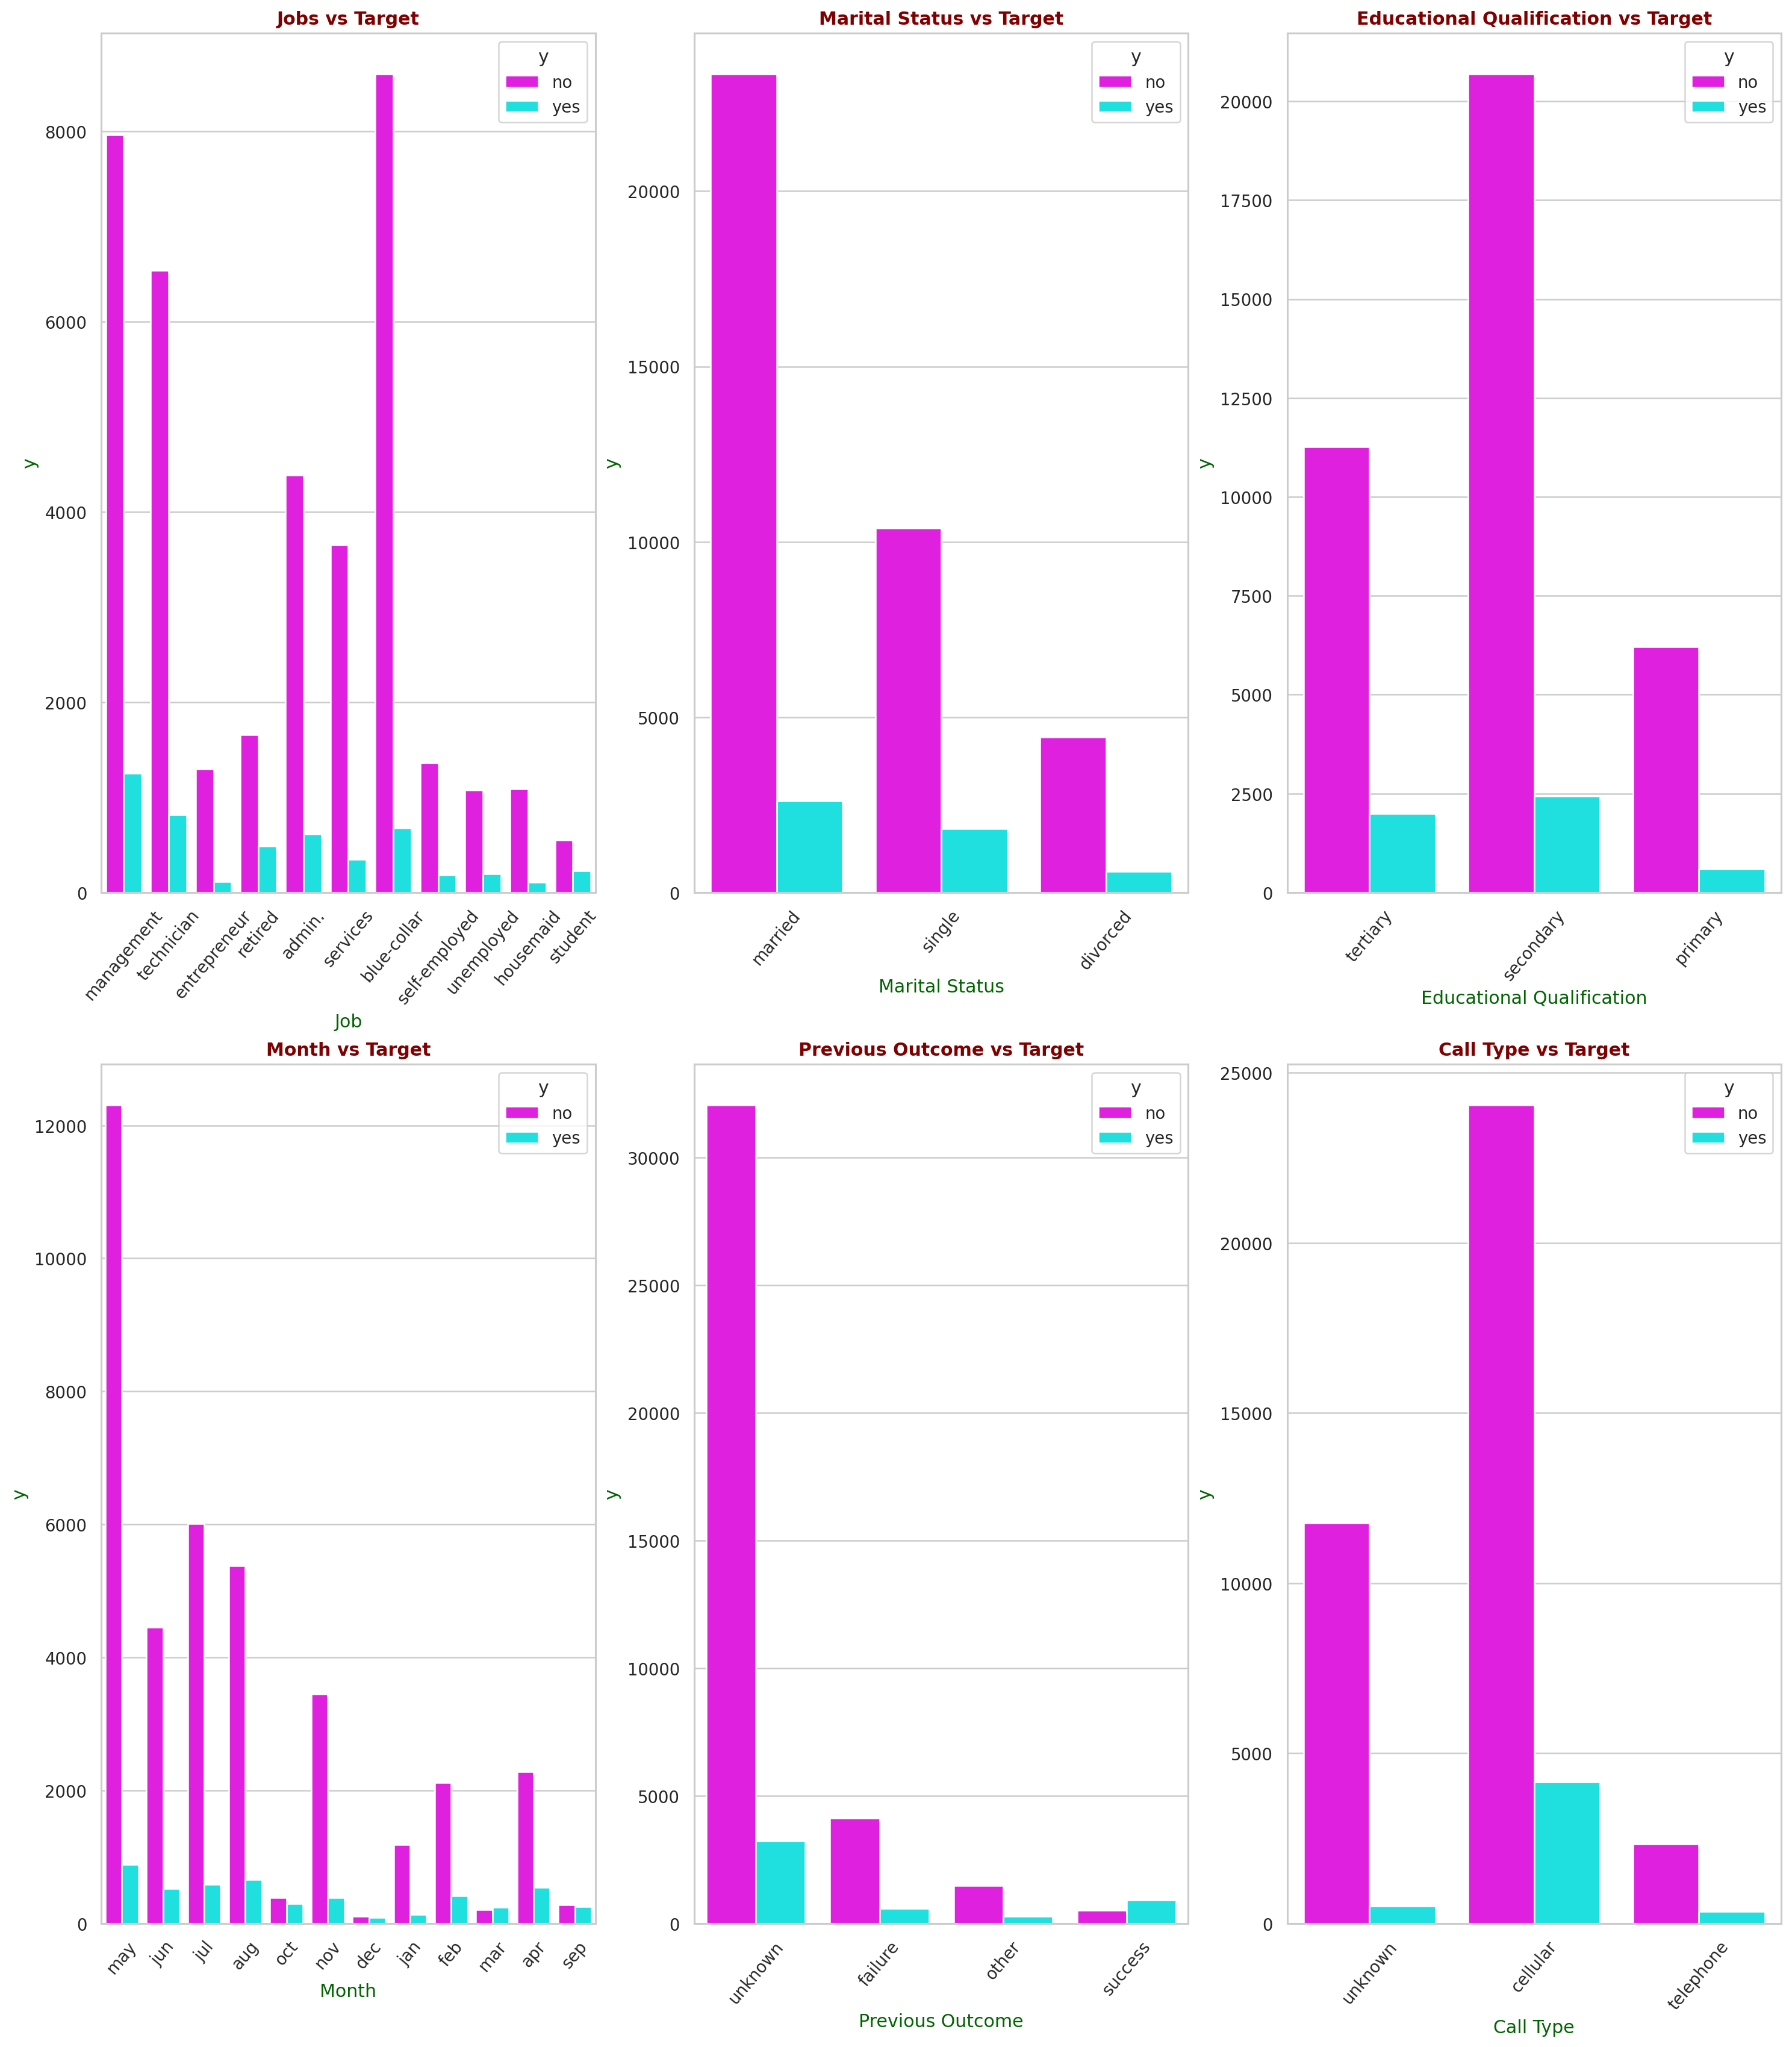

In [76]:
plt.figure(figsize=(20,35), dpi=180)
#plt.suptitle("Categorical Data Vs Target", fontsize=20, fontweight='bold', color='maroon')
#Jobs vs Target
plt.subplot(3,3,1)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='job',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Jobs vs Target', fontweight='bold', color='maroon')
plt.xlabel('Job', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Marital Status vs Target
plt.subplot(3,3,2)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='marital',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Marital Status vs Target', fontweight='bold', color='maroon')
plt.xlabel('Marital Status', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Educational Qualification vs Target
plt.subplot(3,3,3)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='education_qual',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Educational Qualification vs Target', fontweight='bold', color='maroon')
plt.xlabel('Educational Qualification', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Month vs Target
plt.subplot(3,3,4)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='mon',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Month vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Month', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Previous Outcome vs Target
plt.subplot(3,3,5)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='prev_outcome',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Previous Outcome vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Previous Outcome', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Call Type vs Target
plt.subplot(3,3,6)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='call_type',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Call Type vs Target', fontweight='bold', color='maroon')
plt.xlabel('Call Type', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

plt.show()


### **Categorical Data Vs Target**
**Jobs vs Target**

*   Target (No) : Blue Collar
*   Suscribed (Yes): Management

**Marital Status vs Target**

*   Target (No) : Married
*   Subscribed (Yes): Married

**Educational Qualification vs Target**

*   Target (No): Secondary
*   Subscribed (Yes): Secondary

**Month vs Target**

*   Target (No): May
*   Subscribed (Yes): May

**Previous Outcome vs Target**

*   Target (No): unknown
*   Subscribed (Yes): unknown

**Call Type vs Target**

*   Target (No): Cellular
*   Subscribed (Yes): Cellular

### **Feature VS Target Distribution - Percentage of people Subscribed**

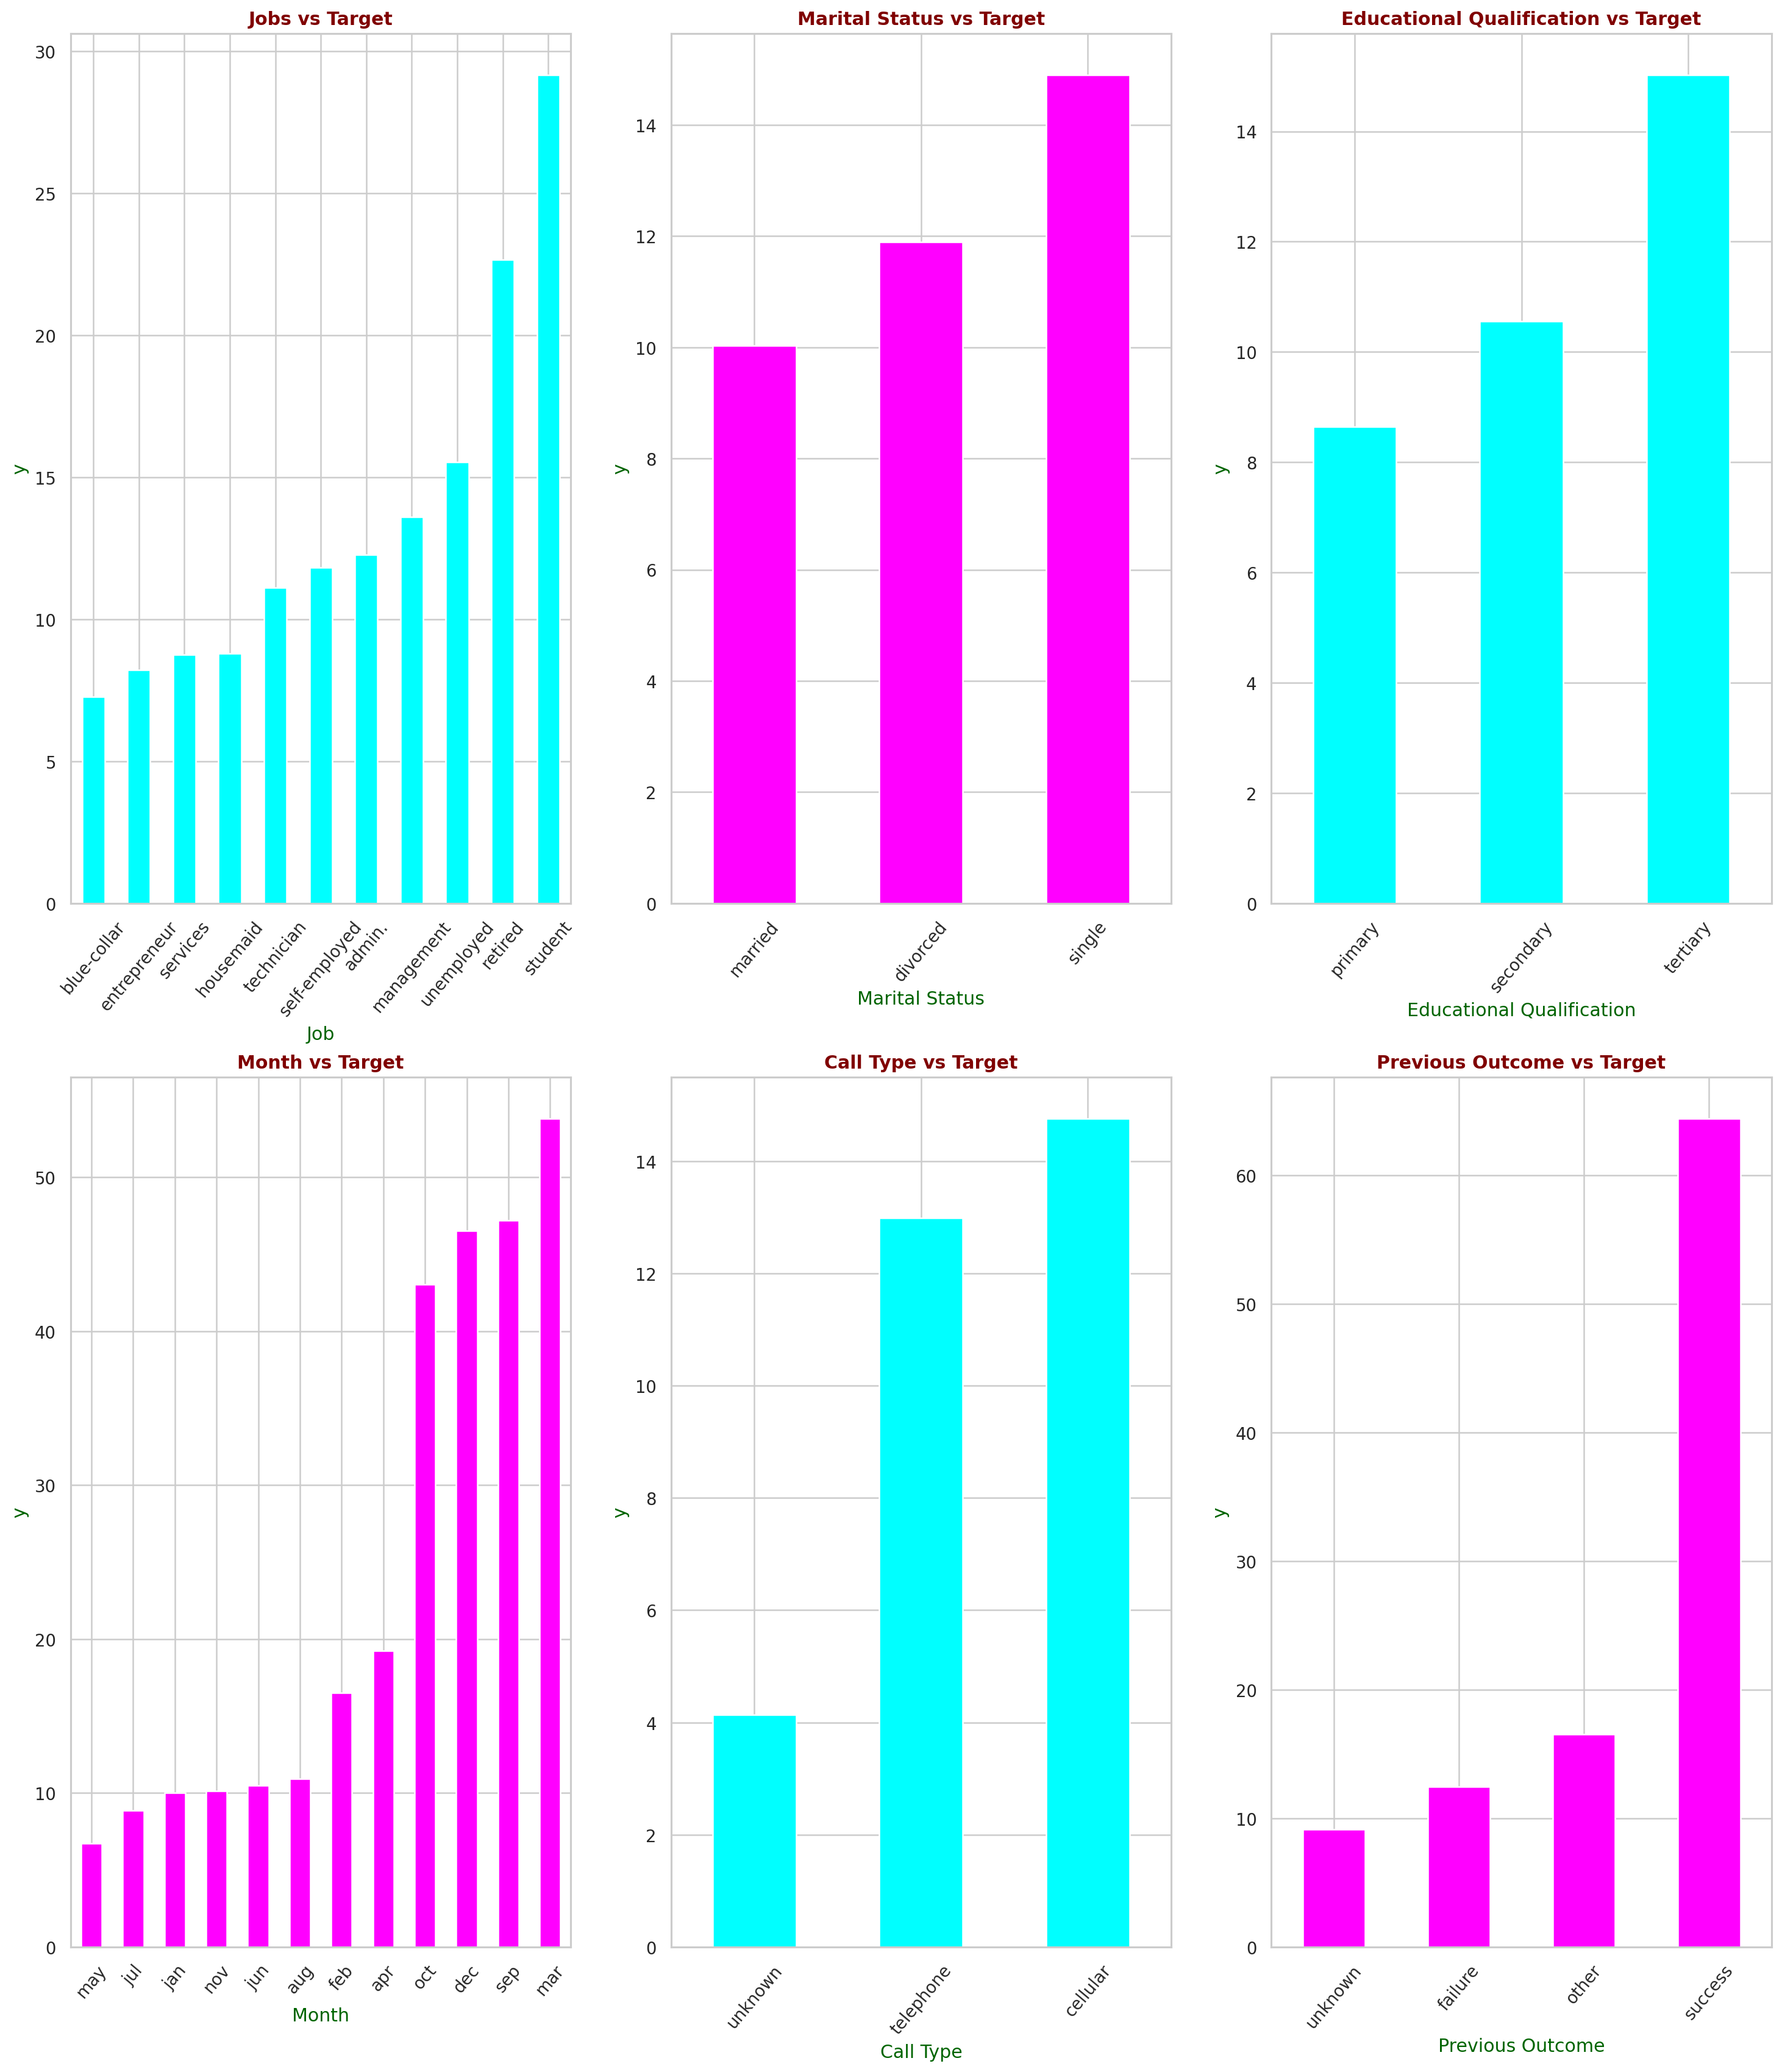

In [77]:
plt.figure(figsize=(20,35), dpi=180)
#plt.suptitle("Categorical Data Vs Target", fontsize=20, fontweight='bold', color='maroon')

#Jobs vs Target
plt.subplot(3,3,1)
(df.groupby('job')['target'].mean()*100).sort_values().plot(kind="bar",color='cyan')
plt.xticks(rotation=50)
plt.title('Jobs vs Target', fontweight='bold', color='maroon')
plt.xlabel('Job', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Marital Status vs Target
plt.subplot(3,3,2)
(df.groupby('marital')['target'].mean()*100).sort_values().plot(kind="bar",color='Magenta')
plt.xticks(rotation=50)
plt.title('Marital Status vs Target', fontweight='bold', color='maroon')
plt.xlabel('Marital Status', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Educational Qualification vs Target
plt.subplot(3,3,3)
(df.groupby('education_qual')['target'].mean()*100).sort_values().plot(kind="bar",color='cyan')
plt.xticks(rotation=50)
plt.title('Educational Qualification vs Target', fontweight='bold', color='maroon')
plt.xlabel('Educational Qualification', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Month vs Target
plt.subplot(3,3,4)
(df.groupby('mon')['target'].mean()*100).sort_values().plot(kind="bar",color='Magenta')
plt.xticks(rotation=50)
plt.title('Month vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Month', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Call Type vs Target
plt.subplot(3,3,5)
(df.groupby('call_type')['target'].mean()*100).sort_values().plot(kind="bar",color='cyan')
plt.xticks(rotation=50)
plt.title('Call Type vs Target', fontweight='bold', color='maroon')
plt.xlabel('Call Type', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Previous Outcome vs Target
plt.subplot(3,3,6)
(df.groupby('prev_outcome')['target'].mean()*100).sort_values().plot(kind="bar",color='Magenta')
plt.xticks(rotation=50)
plt.title('Previous Outcome vs Target', fontweight='bold', color='maroon')
plt.xlabel('Previous Outcome', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')


plt.show()


### **Percentage of people Subscribed -- Categorical Data Vs Target (Categorical)**
**Jobs vs Target**

*   Most subscribed % : Student, retired
*   Least Subscribed % : blue-collar

**Marital Status vs Target**

*   Most subscribed % : Single
*   Least Subscribed % : Married

**Educational Qualification vs Target**

*   Most subscribed % : teritary
*   Least Subscribed % : primary

**Month vs Target**

*   Most subscribed % : March, September
*   Least Subscribed % : May

**Call Type vs Target**

*   Most subscribed % : Cellular
*   Least Subscribed % : unknown

**Previous Outcome vs Target**

*   Most subscribed % : Success
*   Least Subscribed % : unknown



### **Numerical Variable vs Target -- Age, Day, Duration, No of Calls**

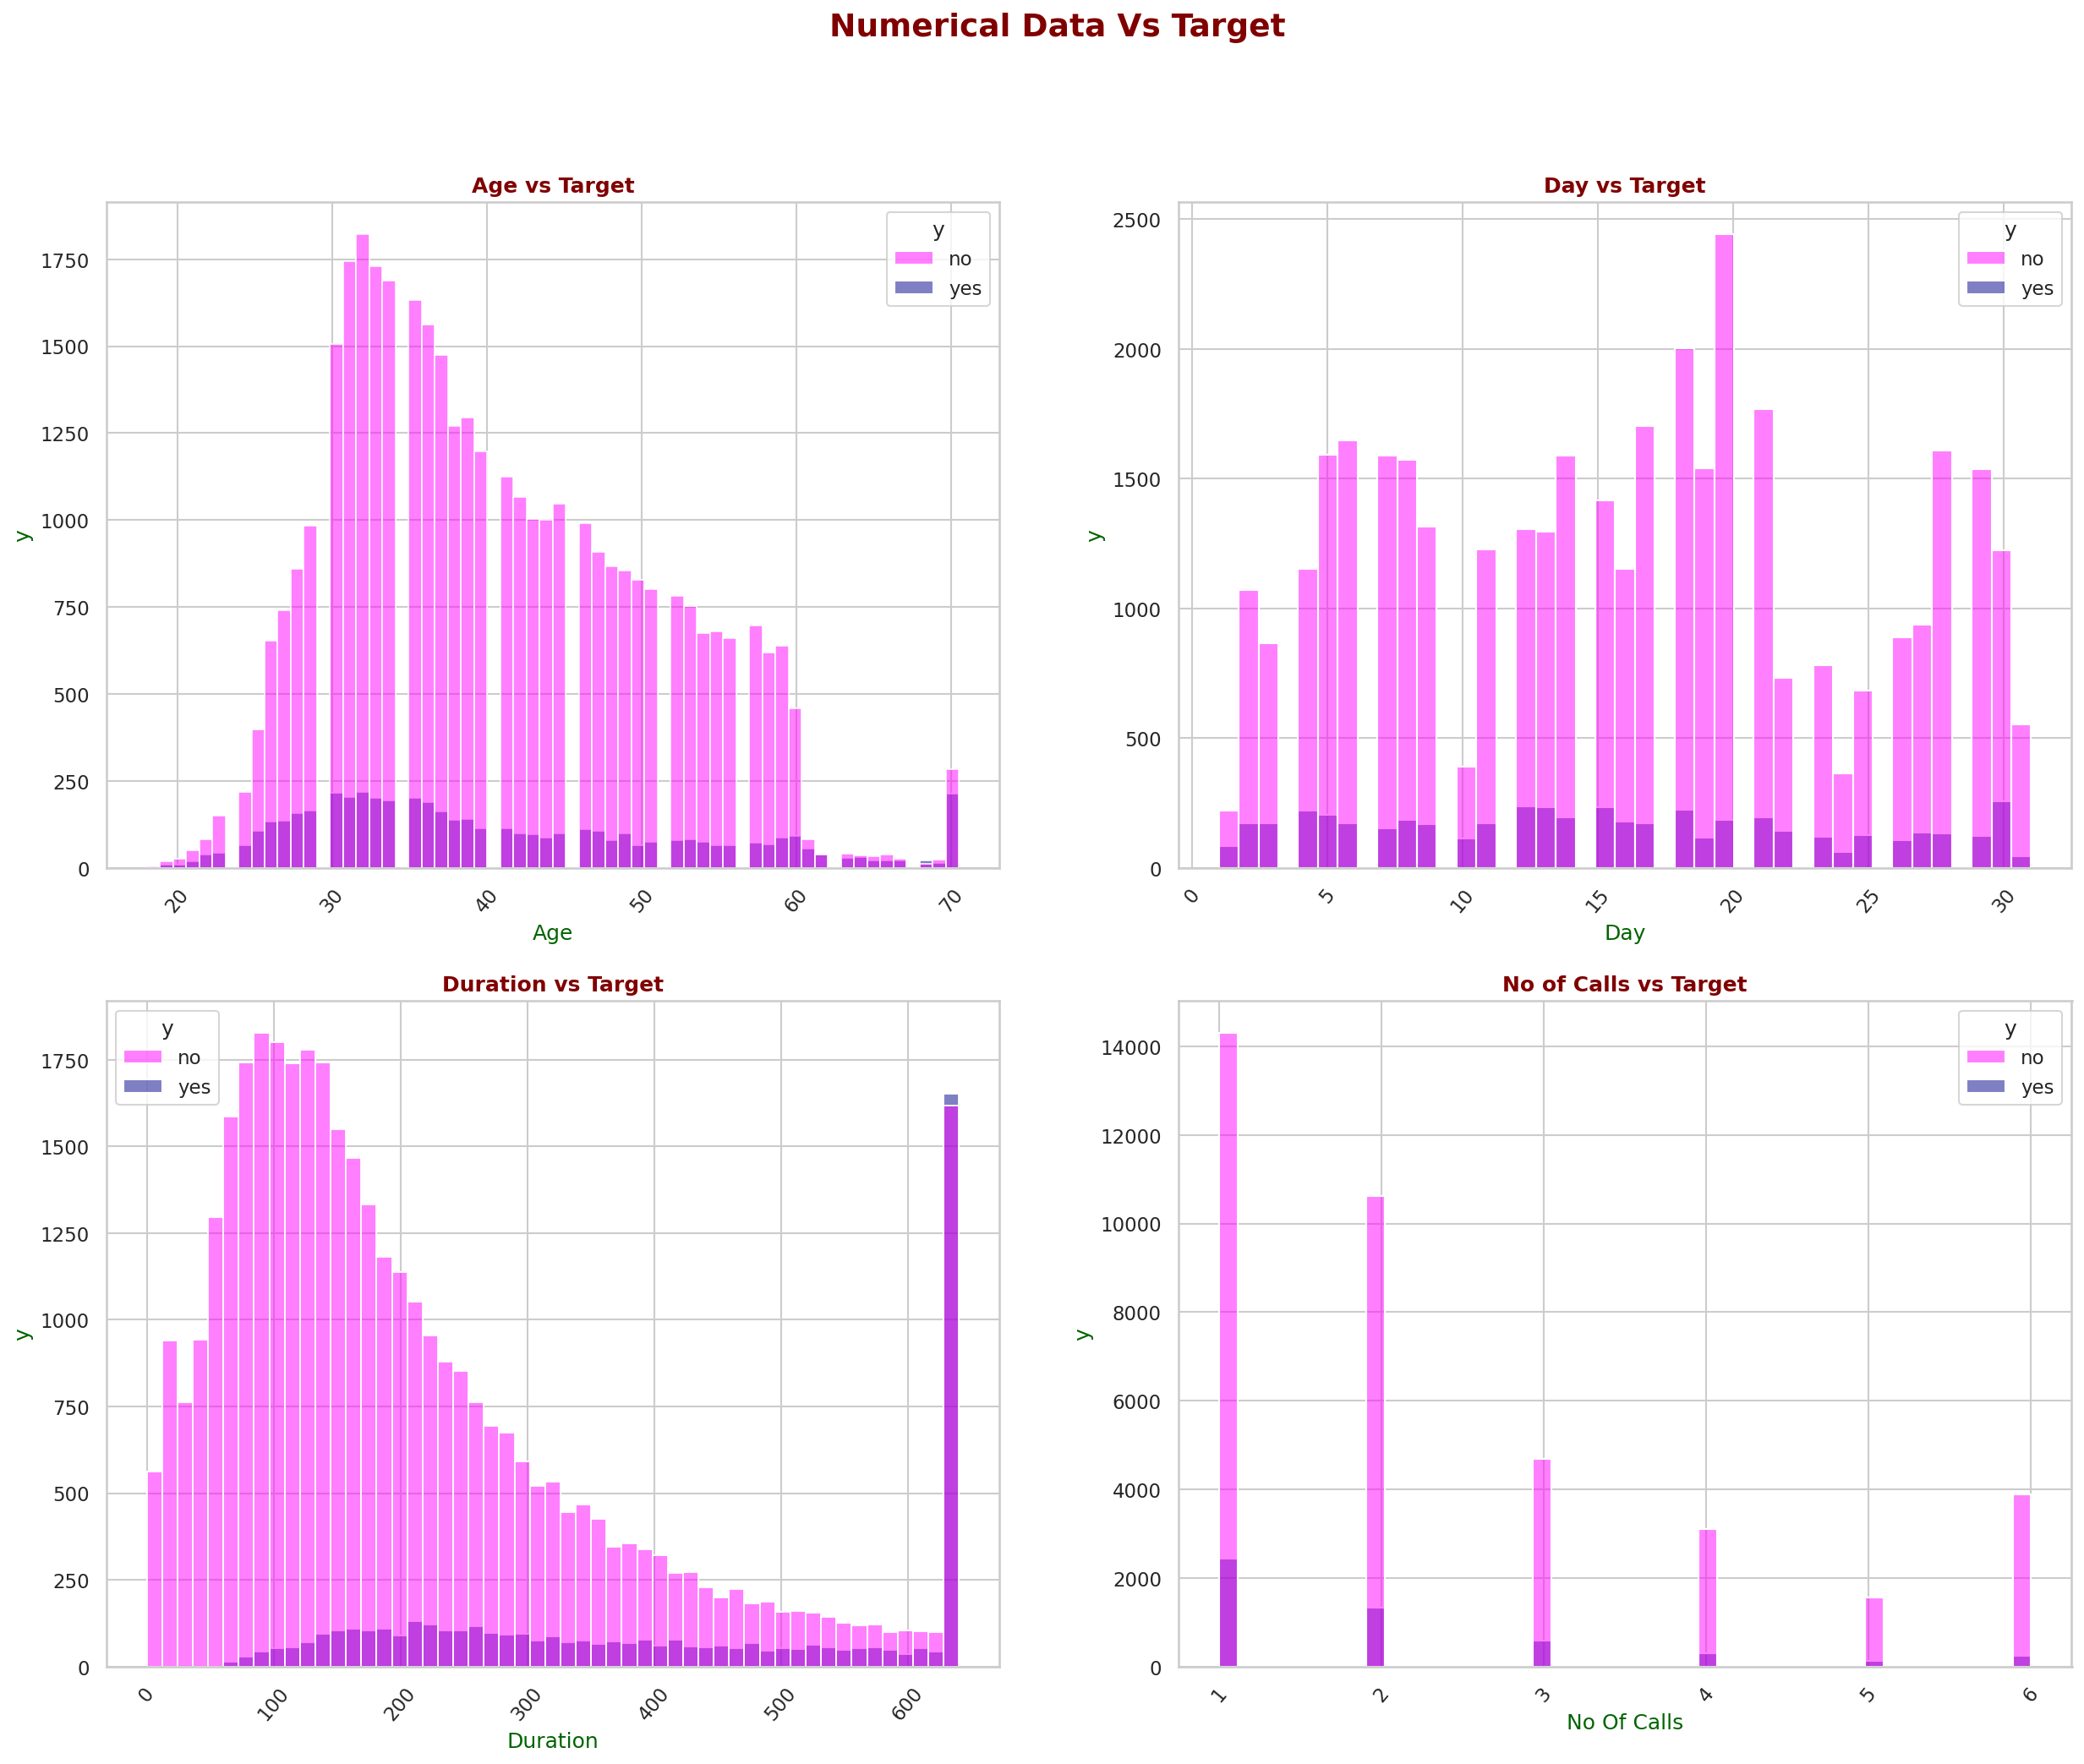

In [78]:
plt.figure(figsize=(20, 15), dpi=150)
#sub title to show title for overall plot
plt.suptitle("Numerical Data Vs Target", fontsize=18,  fontweight='bold', color='maroon')

#Age vs Target
plt.subplot(2,2,1)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='age',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Age vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Age', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')
#df[['age','target']].corr()

#Day vs Target
plt.subplot(2,2,2)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='day',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Day vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Day', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')
#df[['day','target']].corr()

#Duration vs Target
plt.subplot(2,2,3)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='dur',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Duration vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Duration', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#No of Calls vs Target
plt.subplot(2,2,4)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='num_calls',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('No of Calls vs Target', fontweight='bold', color='maroon' )
plt.xlabel('No Of Calls', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

plt.show()


### **Numeric Data vs Target**

**Age vs Target**

*   Target : Middle age people
*   Subscribed : Middle age people

**Day vs Target**

*   Target : Middle of Month
*   Subscribed : Middle of Month

**Duration vs Target**

*  Duration of call is also important to subscribe for insurance.

**No of Calls vs Target**

*  No of calls increase subscrition also getting increase.


# **Encoding**
In this project i am going to use decision tree so we must do label encoding.

In [79]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

### **Job**

In [80]:
#Encoding for job column (Label Encoding)
df['job']=df['job'].map({'blue-collar':1,'entrepreneur':2,'services':3,'housemaid':4,'technician':5,'self-employed':6,'admin.':7,'management':8, 'unemployed':9, 'retired': 10, 'student' : 11})
df.head(3)


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,married,tertiary,unknown,5,may,261.0,1,unknown,no,0
1,44.0,5,single,secondary,unknown,5,may,151.0,1,unknown,no,0
2,33.0,2,married,secondary,unknown,5,may,76.0,1,unknown,no,0


### **Marital Status**

In [81]:
#Encoding for Marital status (Label Encoding)
df['marital'] =df['marital'].map({'married': 1, 'divorced': 2, 'single' : 3})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,tertiary,unknown,5,may,261.0,1,unknown,no,0
1,44.0,5,3,secondary,unknown,5,may,151.0,1,unknown,no,0
2,33.0,2,1,secondary,unknown,5,may,76.0,1,unknown,no,0


### **Educational Qualification**

In [82]:
#encoding for educational qualification (Label Encoding)
df['education_qual'] = df['education_qual'].map({'primary': 1, 'secondary': 2, 'tertiary' :3})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,unknown,5,may,261.0,1,unknown,no,0
1,44.0,5,3,2,unknown,5,may,151.0,1,unknown,no,0
2,33.0,2,1,2,unknown,5,may,76.0,1,unknown,no,0


### **Month**

In [83]:
# Encoding for month column (Label Encoding)
df['mon']=df['mon'].map({'may': 1, 'jul' : 2, 'jan': 3, 'nov': 4, 'jun' : 5, 'aug' : 6, 'feb' : 7, 'apr' : 8, 'oct' : 9, 'dec' : 10 , 'sep': 11, 'mar': 12})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,unknown,5,1,261.0,1,unknown,no,0
1,44.0,5,3,2,unknown,5,1,151.0,1,unknown,no,0
2,33.0,2,1,2,unknown,5,1,76.0,1,unknown,no,0


### **Call Type**

In [84]:
# Encoding for call type column (Label Encoding)
df['call_type'] = df['call_type'].map({'unknown': 1, 'telephone' : 2, 'cellular' : 3})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,1,5,1,261.0,1,unknown,no,0
1,44.0,5,3,2,1,5,1,151.0,1,unknown,no,0
2,33.0,2,1,2,1,5,1,76.0,1,unknown,no,0


### **Previous Outcome**

In [85]:
# Encoding for previous outcome column (Label Encoding)
df['prev_outcome']=df['prev_outcome'].map({'unknown' : 1, 'failure' : 2, 'other' : 3, 'success': 4})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,1,5,1,261.0,1,1,no,0
1,44.0,5,3,2,1,5,1,151.0,1,1,no,0
2,33.0,2,1,2,1,5,1,76.0,1,1,no,0


# **Feature and Target Selection**

In [86]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

In [87]:
# X --> Feature y-- > Target

x = df[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']].values
y=df['target'].values

# **Spliting**

In [88]:
# splitting the data as train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 3 )


# **Balancing**

In [89]:
#Balancing the data
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

In [90]:
print(len(x_train_smt))
print(len(y_train_smt))

52623
52623


# **Scaling**

In [91]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smt)
x_test_scaled = scaler.transform(x_test)

# **Modelling**

## **Logistic Regression**


In [92]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()

lr.fit(x_train_scaled,y_train_smt)
lr.score(x_test_scaled,y_test)

0.7639499884232461

In [93]:
y_pred=lr.predict_proba(x_test_scaled)
y_pred

array([[0.86564657, 0.13435343],
       [0.99017735, 0.00982265],
       [0.8879311 , 0.1120689 ],
       ...,
       [0.23910555, 0.76089445],
       [0.14483699, 0.85516301],
       [0.96961275, 0.03038725]])

In [94]:
log_reg_auroc = roc_auc_score(y_test,y_pred[:,1])
print("AUROC score for logistic regression  :  ",round(log_reg_auroc,2))

AUROC score for logistic regression  :   0.88


## **K-Nearest Neighbour (KNN)**

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn= KNeighborsClassifier(i)
  knn.fit(x_train_scaled, y_train_smt)
  print("K value :", i, "Train Score : ", knn.score(x_train_scaled,y_train_smt), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x_test_scaled, y_test, cv=10)))

K value : 1 Train Score :  1.0 Cross Value Accuracy : 0.8682563248358439
K value : 2 Train Score :  0.9948881667711837 Cross Value Accuracy : 0.8886317915540106
K value : 3 Train Score :  0.977728369724265 Cross Value Accuracy : 0.8845809997425004
K value : 4 Train Score :  0.9775003325542063 Cross Value Accuracy : 0.8926835221664307
K value : 5 Train Score :  0.9678847652167303 Cross Value Accuracy : 0.8903687073516158
K value : 6 Train Score :  0.9681318054842939 Cross Value Accuracy : 0.8933781007252908
K value : 7 Train Score :  0.9611386656024932 Cross Value Accuracy : 0.8929158083344062
K value : 8 Train Score :  0.9614427151625715 Cross Value Accuracy : 0.8947669896141797
K value : 9 Train Score :  0.9563498850312601 Cross Value Accuracy : 0.8945352399038669
K value : 10 Train Score :  0.9559128137886476 Cross Value Accuracy : 0.8954615681730399
K value : 20 Train Score :  0.9390760693993121 Cross Value Accuracy : 0.8937251888330973
K value : 30 Train Score :  0.932329969785075 

**k=10 is a good cross validation accuracy of 0.895**

In [96]:
knn= KNeighborsClassifier(i)
knn.fit(x_train_scaled, y_train_smt)
print("KNN Score: ",knn.score(x_test_scaled,y_test))
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(x_test)[:, 1]))


KNN Score:  0.7954387589719842
AUROC on the sampled dataset :  0.5457996031079558


## **Decision Tree**

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
dt = DecisionTreeClassifier()
dt.fit(x_train_smt,y_train_smt)
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt))
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

Decision Tree Score :  1.0
AUROC on the sampled dataset :  0.7894975752438423


In [99]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(x_train_smt, y_train_smt) # the model is trained
  trainAccuracy = accuracy_score(y_train_smt, dt.predict(x_train_smt)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, x_test_scaled, y_test, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.7833266822492067  Cross val score :  0.8850428897901377
Depth  :  2  Training Accuracy :  0.8105011116812041  Cross val score :  0.8936105210076821
Depth  :  3  Training Accuracy :  0.8651540201052772  Cross val score :  0.895462775202781
Depth  :  4  Training Accuracy :  0.9049275031830188  Cross val score :  0.895463177546028
Depth  :  5  Training Accuracy :  0.9130228227201034  Cross val score :  0.8966208531822669
Depth  :  6  Training Accuracy :  0.9280732759439788  Cross val score :  0.8945357763615297
Depth  :  7  Training Accuracy :  0.9369667255762689  Cross val score :  0.8937253229475131
Depth  :  8  Training Accuracy :  0.9425346331452027  Cross val score :  0.8916418554997639
Depth  :  9  Training Accuracy :  0.9542215381107121  Cross val score :  0.8912940968198791
Depth  :  10  Training Accuracy :  0.9623168576477966  Cross val score :  0.89060072529076
Depth  :  20  Training Accuracy :  0.9992778822948141  Cross val score :  0.8724239

**k= 5 is the good cross validation score of 0.896**

In [100]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train_smt,y_train_smt)
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt))
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

Decision Tree Score :  0.9130228227201034
AUROC on the sampled dataset :  0.8630995780140512


## **XG Boost**

In [101]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(x_train_smt,y_train_smt) #train the model
  print("Learning rate : ", lr," Train score : ", model.score(x_train_smt,y_train_smt)," Cross-Val score : ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))


Learning rate :  0.01  Train score :  0.9438458468730403  Cross-Val score :  0.8970835479163984
Learning rate :  0.02  Train score :  0.9534614142105163  Cross-Val score :  0.896736325694176
Learning rate :  0.03  Train score :  0.9603215324097828  Cross-Val score :  0.898125214583065
Learning rate :  0.04  Train score :  0.9655473842236284  Cross-Val score :  0.8976619833912709
Learning rate :  0.05  Train score :  0.9690439541645288  Cross-Val score :  0.8985883116604437
Learning rate :  0.1  Train score :  0.9782224502593923  Cross-Val score :  0.8975465108793614
Learning rate :  0.11  Train score :  0.9797046918647739  Cross-Val score :  0.8971990204283079
Learning rate :  0.12  Train score :  0.980407806472455  Cross-Val score :  0.8996299783271103
Learning rate :  0.13  Train score :  0.9808258746175627  Cross-Val score :  0.8985892504613536
Learning rate :  0.14  Train score :  0.9811869334701556  Cross-Val score :  0.8981254828118965
Learning rate :  0.15  Train score :  0.9816

**Learning Rate 0.2 is getting the best cross validation score of 0.899**

## **Random Forest**

In [102]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)

In [103]:
#doing cross validation to get best value of max _depth to prevent overfitted model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(x_train, y_train) # the model is trained
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, x_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.9992778822948141  Cross val score :  0.8834119714385553
Depth  :  2  Training Accuracy :  0.9992778822948141  Cross val score :  0.8851486101811947
Depth  :  3  Training Accuracy :  0.9992778822948141  Cross val score :  0.8908216736483718
Depth  :  4  Training Accuracy :  0.9992778822948141  Cross val score :  0.8941791349948088
Depth  :  5  Training Accuracy :  0.9992778822948141  Cross val score :  0.8971893993163823
Depth  :  6  Training Accuracy :  0.9992778822948141  Cross val score :  0.899128651359149
Depth  :  7  Training Accuracy :  0.9992778822948141  Cross val score :  0.9025440417243121
Depth  :  8  Training Accuracy :  0.9992778822948141  Cross val score :  0.9042228771440565
Depth  :  9  Training Accuracy :  0.9992778822948141  Cross val score :  0.9046859489658166
Depth  :  10  Training Accuracy :  0.9992778822948141  Cross val score :  0.9045411976466389


**Depth = 8 is giving the good cross validation score fo 0.904**

# **Solution Statement**

Models are tested, below are the AUROC value of each model

*   **Logistic Regression** - AUROC Score is **0.88**
*   **KNN** - AUROC Score is  **0.895**
*   **Decision Tree** - AUROC Score is **0.897**
*   **XG Boost** - AUROC Score is  **0.899**
*   **Random Forest** - AUROC Score is **0.904**

**Hence Random Forest is giving the good AUROC Score of 0.904, so Random Forest is the best model for customer convertion prediction**





# **Feature Importance**

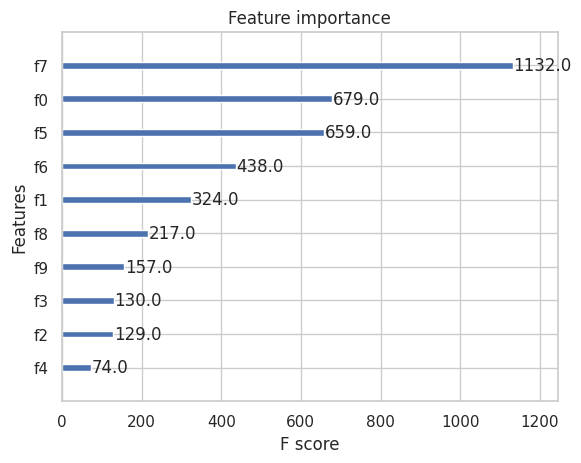

In [104]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.show()

In [105]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

f0 - Age, f1 - Job, f2 - marital status, f3- educational qualification,
f4 - call type, f5 - day, f6 - mon, f7 -dur, f8 - number of calls,
f9 - previous outcome f10 - y


### **Conclusion:**

Based on the Feature Importance given by best machine Learning that will predict if a client subscribed to the insurance.

The client should focused on the top few features of order given below to have them subscribed to the insurance.

*   Duration - Longer the call better influncing the clients
*   Age - Age of the person plays an important role in insurance. Middle age people are targeted more and people who suscribed to insurance also middle age people.  
*   Day - People who subscribed to insurance are mostly mid of the month.
*   Month - In the month of may people subscribed to insurance are more.
*   Job - In this blue collar people are targeted more but people who subscribed more are from management job.
